# Low-rank matrix factorization

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Generate 2D data

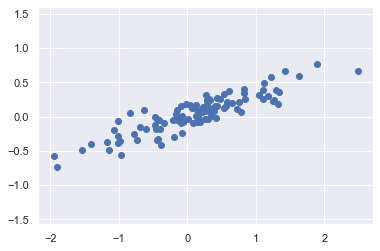

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 100)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

# PCA with Eigendecomposition

This is a simple example of vanilla PCA taken from this blog post: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [4]:
print(pca.components_)

[[ 0.95257252  0.30431168]
 [-0.30431168  0.95257252]]


In [5]:
print(pca.explained_variance_)

[0.71323427 0.01483411]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

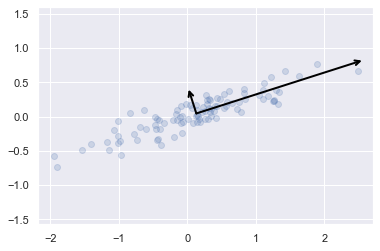

In [6]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

### PCA as dimensionality reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:

In [7]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (100, 2)
transformed shape: (100, 1)


The transformed data has been reduced to a single dimension.
To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

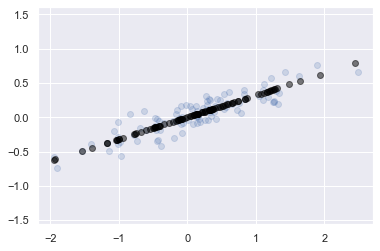

In [8]:
X_pca_rec = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_pca_rec[:, 0], X_pca_rec[:, 1], alpha=0.5, color='black')
plt.axis('equal');

### Choosing the number of components

/Users/chris/Documents/GU/GU-ANLY-580-FALL-2021/.venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'variance captured')

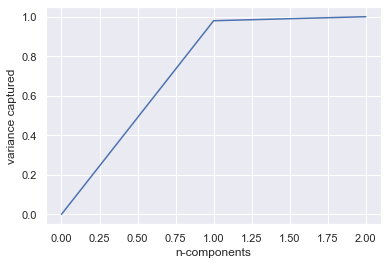

In [9]:
d = pca.explained_variance_ratio_
plt.plot([0, 1, 2], np.cumsum([0, d, 1.0 - d]), 'b-')
plt.xlabel('n-components')
plt.ylabel('variance captured')

In [10]:
pca.components_

array([[0.95257252, 0.30431168]])

# PCA with SVD

Here we compare a low rank approximation using SVD with the PCA method above to show they give very similar results

In [11]:
from numpy.linalg import svd

X.shape
U, s, VT = svd(X)

In [12]:
U.shape, s.shape, VT.shape

((100, 100), (2,), (2, 2))

In [13]:
s

array([8.51762963, 1.21218241])

In [14]:
# V is a rotation: it's columns better be unit vectors
np.linalg.norm(VT.T, axis=0)

array([1., 1.])

In [15]:
V_red = np.expand_dims(VT.T[:, 0], 0)

In [19]:
V_red.shape

(1, 2)

In [21]:
X_red = X.dot(V_red.T)

In [23]:
X_svd_rec = np.dot(X_red, V_red)

In [24]:
X_svd_rec.shape

(100, 2)

In [35]:
# Compute the absolute distance between data reconstructed with PCA vs. data reconstructed with SVD
np.median(np.abs(X_pca_rec - X_svd_rec), axis=0)

array([0.00085406, 0.00265903])